### 1) Introduction

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bodyPerformance.csv")

In [3]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [6]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

- A,B,C,D
- A -> 1, B -> 2, C -> 3, D -> 4

In [7]:
data.groupby('class')['class'].count()

class
A    3348
B    3347
C    3349
D    3349
Name: class, dtype: int64

In [8]:
data_class = []
for i in data["class"]:
    if i == "A":
        data_class.append(1)
    elif i == "B":
        data_class.append(2)
    elif i == "C":
        data_class.append(3)
    else:
        data_class.append(4)
data["class"] = data_class

In [9]:
data["class"].head()

0    3
1    1
2    3
3    2
4    2
Name: class, dtype: int64

- gender => F -> 1, M -> 0

In [10]:
data["gender"] = [0 if i == "M" else 1 for i in data["gender"]]

In [11]:
data["gender"].head()

0    0
1    0
2    0
3    0
4    0
Name: gender, dtype: int64

### 2) Data Visualization

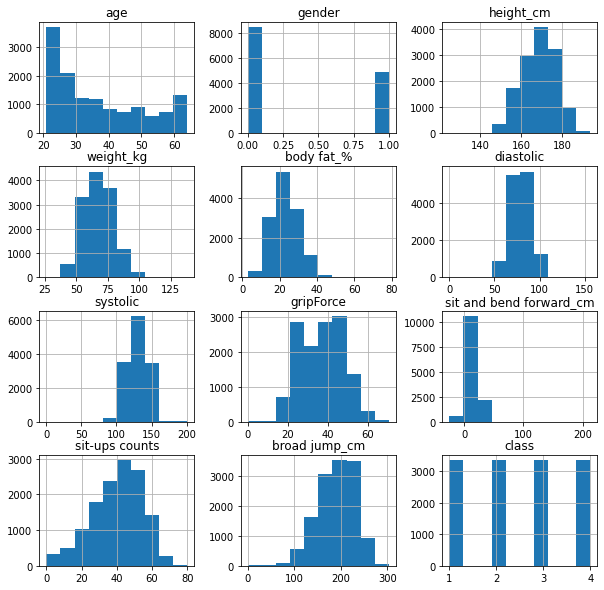

In [12]:
data.hist(figsize = (10, 10))
plt.show()

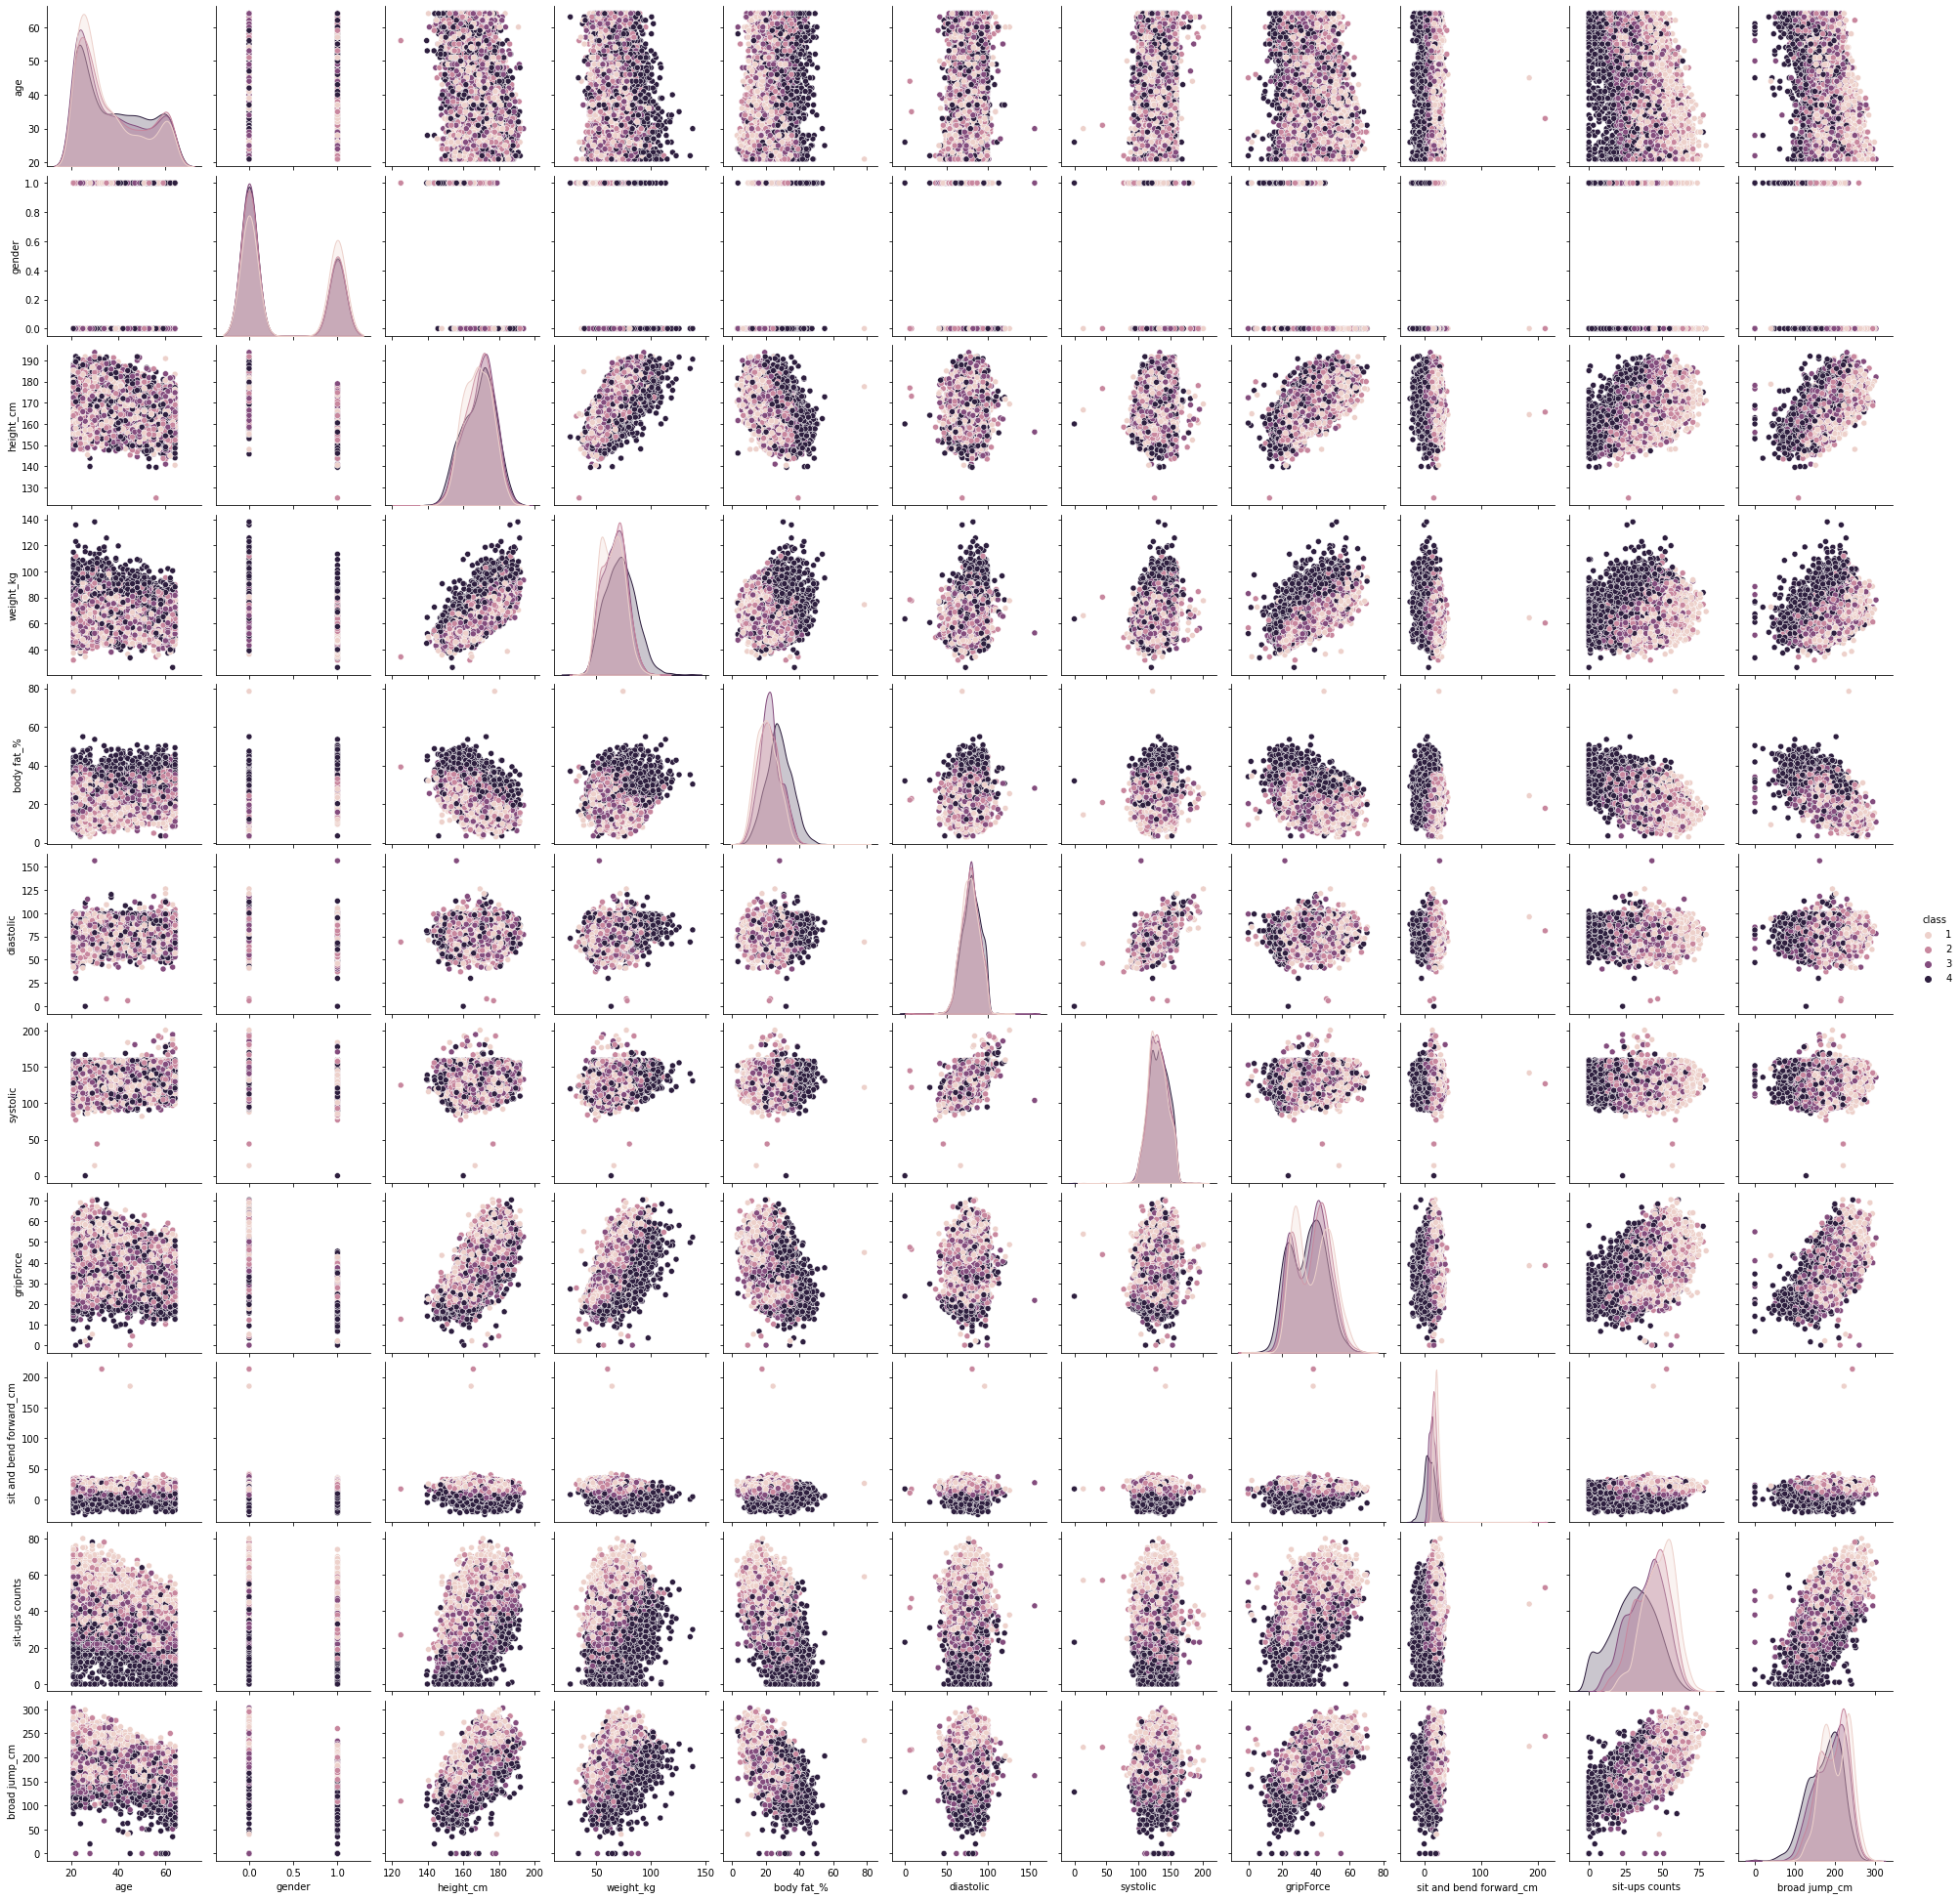

In [13]:
sns.pairplot(data, hue="class")
plt.show()

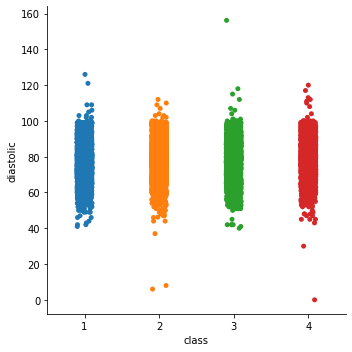

In [14]:
sns.catplot(x="class", y="diastolic", data = data)

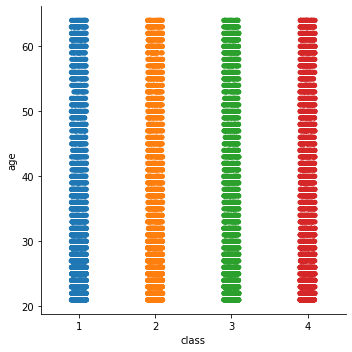

In [15]:
sns.catplot(x="class", y="age", data = data)

### 3) Data Preprocessing

In [16]:
x_data = data.drop(["class"], axis = 1)
y = data["class"]

- Normalization

In [17]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [37]:
x.shape

(13393, 11)

- Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

### 4) Classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### 4.1. KNN

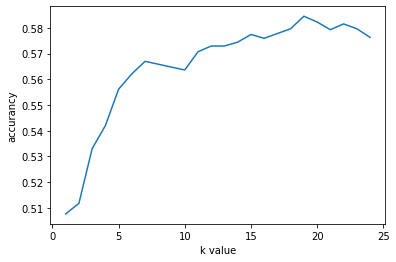

In [20]:
score_list = []

for i in range(1, 25):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))

plt.plot(range(1, 25), score_list)
plt.xlabel("k value")
plt.ylabel("accurancy")
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(x_train, y_train)
y_head_knn = knn.predict(x_test)

#### 4.2. Decision Tree

In [22]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_head_tree = tree.predict(x_test)

#### 4.3. Random Forest

In [23]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_head_rf = rf.predict(x_test)

### Accuracy

In [24]:
print("KNN accuracy: {}".format(knn.score(x_test, y_test)))
print("Decision Tree accuracy: {}".format(tree.score(x_test, y_test)))
print("Random Rorest accuracy: {}".format(rf.score(x_test, y_test)))

KNN accuracy: 0.5778275475923852
Decision Tree accuracy: 0.6446435237028743
Random Rorest accuracy: 0.7420679357969392


### Conclusion
- Random Forest is best of them 

#### Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix

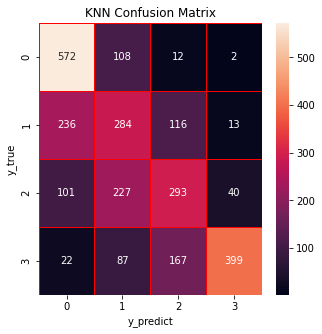

In [30]:
cm_knn = confusion_matrix(y_test, y_head_knn)

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm_knn, annot = True, linewidths = 0.5, linecolor = "red", fmt = "0.0f", ax = ax)
plt.xlabel("y_predict")
plt.ylabel("y_true")
plt.title("KNN Confusion Matrix")
plt.show()


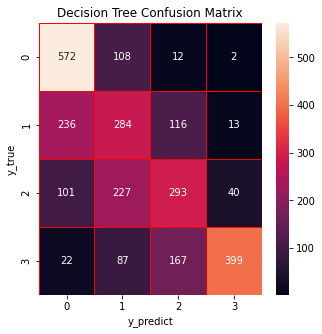

In [31]:
cm_tree = confusion_matrix(y_test, y_head_tree)

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm_knn, annot = True, linewidths = 0.5, linecolor = "red", fmt = "0.0f", ax = ax)
plt.xlabel("y_predict")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()


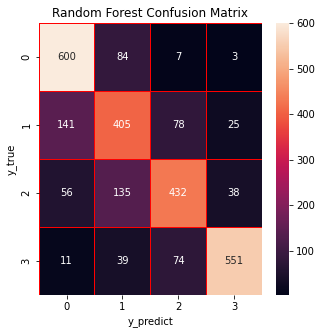

In [33]:
cm_rf = confusion_matrix(y_test, y_head_rf)

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm_rf, annot = True, linewidths = 0.5, linecolor = "red", fmt = "0.0f", ax = ax)
plt.xlabel("y_predict")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [34]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


In [40]:
input_data3 = (27.0, 0, 172.3, 75.24, 21.3, 80.0, 130.0, 54.9, 18.4, 60.0, 217.0)
input_data2 = (32.0, 0, 174.5, 71.10, 18.4, 76.0, 147.0, 41.4, 15.2, 53.0, 219.0)

input_data_array = np.asarray(input_data2)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Normalization the data
n = [(input_data_reshape[0][0] - np.min(x_data["age"]))/(np.max(x_data["age"]) - np.min(x_data["age"])), 
    (input_data_reshape[0][1] - np.min(x_data["gender"]))/(np.max(x_data["gender"]) - np.min(x_data["gender"])),
    (input_data_reshape[0][2] - np.min(x_data["height_cm"]))/(np.max(x_data["height_cm"]) - np.min(x_data["height_cm"])),
    (input_data_reshape[0][3] - np.min(x_data["weight_kg"]))/(np.max(x_data["weight_kg"]) - np.min(x_data["weight_kg"])),
    (input_data_reshape[0][4] - np.min(x_data["body fat_%"]))/(np.max(x_data["body fat_%"]) - np.min(x_data["body fat_%"])),
    (input_data_reshape[0][5] - np.min(x_data["diastolic"]))/(np.max(x_data["diastolic"]) - np.min(x_data["diastolic"])),
    (input_data_reshape[0][6] - np.min(x_data["systolic"]))/(np.max(x_data["systolic"]) - np.min(x_data["systolic"])),
    (input_data_reshape[0][7] - np.min(x_data["gripForce"]))/(np.max(x_data["gripForce"]) - np.min(x_data["gripForce"])),
    (input_data_reshape[0][8] - np.min(x_data["sit and bend forward_cm"]))/(np.max(x_data["sit and bend forward_cm"]) - np.min(x_data["sit and bend forward_cm"])),
    (input_data_reshape[0][9] - np.min(x_data["sit-ups counts"]))/(np.max(x_data["sit-ups counts"]) - np.min(x_data["sit-ups counts"])),
    (input_data_reshape[0][10] - np.min(x_data["broad jump_cm"]))/(np.max(x_data["broad jump_cm"]) - np.min(x_data["broad jump_cm"]))]

n = np.asarray(n).reshape(-1, 1)
n = n.reshape(1, 11)

std_data = n

# Prediction
prediction = rf.predict(std_data)
#print(prediction)

if prediction == 1:
    print('A is best stratified')
elif prediction == 2:
    print('B is normal stratified')
elif prediction == 3:
    print('C is not bad stratified')
else:
    print('D is worst stratified')

B is normal stratified
